In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
plt.style.use("ggplot")
sns.set_context("talk")

In [8]:
def load_mss_results():
    msses = [
        "0.00", "0.01", "0.02", "0.03", "0.04",
        "0.05", "0.06", "0.07", "0.08", "0.09",
        # "0.10", "0.11", "0.15", "0.20"
        "0.10", "0.15", "0.20"
    ]
    files = [
        f"../results/tclr_model_testing/all/TD4_MSS{i}_RT_MS_exhaustive_new_hoover/results.pickle" 
        for i in msses
    ]
    results = {i: pd.read_pickle(f) for i, f in zip(msses, files)}
    return results

In [9]:
def calc_scores(results):
    scores = {}
    for mss, res in results.items():
        df = res["simmed_data"]
        mscores = df.groupby("site_name").apply(
            lambda x: r2_score(x["actual"], x["model"])
        )
        mean = mscores.mean()
        std = mscores.std()
        median = mscores.median()
        scores[mss] = {
            "mean": mean,
            "std": std,
            "median": median
        }
    return pd.DataFrame(scores)

In [10]:
results = load_mss_results()
scores = calc_scores(results).T
scores

,mean,std,median
0.00,0.336975,0.708281,0.448850
0.01,0.343887,0.713318,0.472397
0.02,0.367245,0.706519,0.514960
0.03,0.432063,0.661406,0.578819
0.04,0.345727,0.883387,0.572001
0.05,0.354104,0.876060,0.563114
0.06,0.398342,0.858953,0.595572
0.07,0.408456,0.851426,0.576926
0.08,0.406671,0.851473,0.576926
0.09,0.405401,0.851100,0.576926


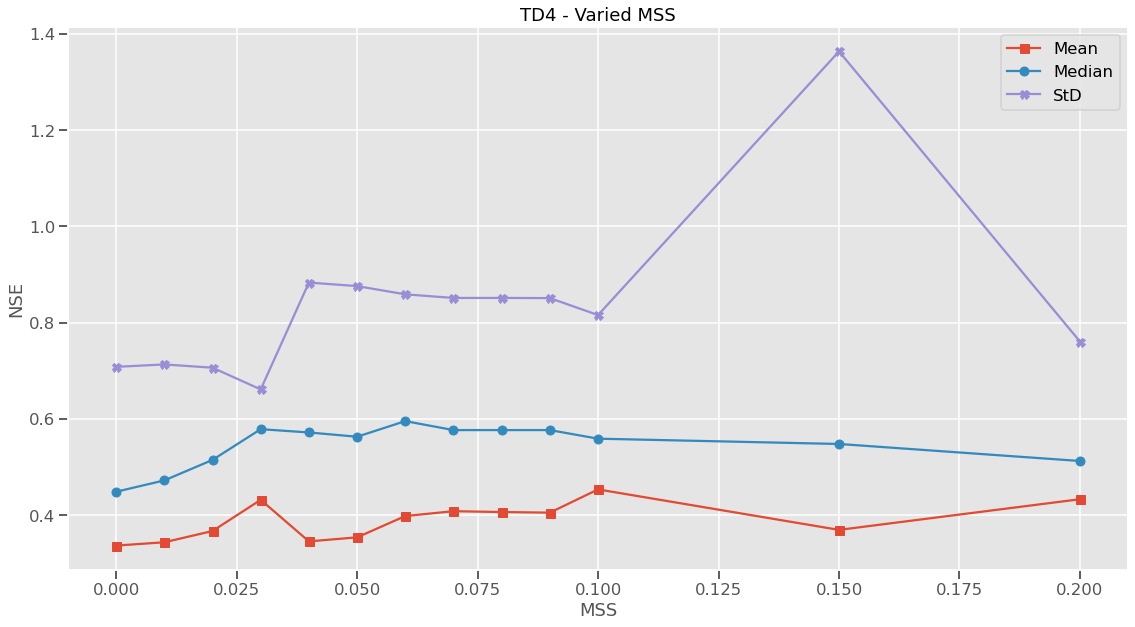

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(19, 10))
scores.index = scores.index.astype(float)
ax.plot(scores.index, scores["mean"], label='Mean', marker="s")
ax.plot(scores.index, scores["median"], label='Median', marker="o")
ax.plot(scores.index, scores["std"], label='StD', marker="X")
ax.set_ylabel("NSE")
ax.set_xlabel("MSS")
ax.set_title("TD4 - Varied MSS")
ax.legend(loc="upper right")
plt.savefig("./figures/mss_line_plot_new.png", dpi=300)
plt.show()

In [12]:
rank = scores.copy()
rank[["mean", "median"]] = rank[["mean", "median"]].rank(ascending=False)
rank["std"] = rank["std"].rank(ascending=True)
rank["score"] = rank.sum(axis=1)
rank.sort_values("score")

,mean,std,median,score
0.03,3.0,1.0,2.0,6.0
0.10,1.0,6.0,8.0,15.0
0.07,4.0,8.0,4.0,16.0
0.09,6.0,7.0,4.0,17.0
0.06,7.0,10.0,1.0,18.0
0.08,5.0,9.0,4.0,18.0
0.20,2.0,5.0,11.0,18.0
0.02,9.0,2.0,10.0,21.0
0.01,12.0,4.0,12.0,28.0
0.05,10.0,11.0,7.0,28.0
